In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# working with dates
from datetime import datetime

import wrangle

In [2]:
df = wrangle.acquire()

In [3]:
# url = 'https://top100.winespectator.com/wp-content/themes/top100-theme/src/data/1988.json'

In [4]:
# wines = requests.get(url).json()

In [5]:
# url = 'https://top100.winespectator.com/wp-content/themes/top100-theme/src/data/'
# wines = []
# year = 1988
# while year <= 2021:
#     new_wines = requests.get(url+str(year)+'.json').json()
#     wines.extend(new_wines)
#     year += 1

In [6]:
# df = pd.DataFrame(wines)

In [7]:
len(df)

3200

In [8]:
df.head()

,id,winery_full,winery_full_nonentities,wine_full,vintage,note,taster_initials,color,country,region,score,price,issue_date,top100_year,top100_rank,alternate_bottle_size
0,5893,Château Lynch Bages,Château Lynch Bages,Pauillac,1985,"Rich and massively concentrated, with layers o...",NaN,red,France,Bordeaux,97,37,"Apr 30, 1988",1988,1,NaN
1,5786,Château Margaux,Château Margaux,Margaux,1985,A beautifully structured and proportioned wine...,NaN,red,France,Bordeaux,99,76,"Apr 30, 1988",1988,2,NaN
2,70904,Domaine de la Romanée-Conti,Domaine de la Romanée-Conti,Richebourg,1985,"A truly great wine. Amazing concentration, bri...",HS,red,France,Burgundy,100,210,"Feb 29, 1988",1988,3,NaN
3,4652,Tollot-Beaut,Tollot-Beaut,Corton,1985,"Rich, rough and magnificently complex, a power...",NaN,red,France,Burgundy,97,75,"Mar 15, 1988",1988,4,NaN
4,8365,Gaja,Gaja,Barbaresco Sorì Tildìn,1985,"A majestic wine, beautifully harmonious, seaml...",NaN,red,Italy,Piedmont,97,94,"Dec 15, 1988",1988,5,NaN


In [9]:
df.columns

Index(['id', 'winery_full', 'winery_full_nonentities', 'wine_full', 'vintage',
       'note', 'taster_initials', 'color', 'country', 'region', 'score',
       'price', 'issue_date', 'top100_year', 'top100_rank',
       'alternate_bottle_size'],
      dtype='object')

In [10]:
df = wrangle.prepare(df)

In [11]:
df.head()

,winery,wine,vintage,note,score,price,issue_year,top100_year,top100_rank,aged,France,Italy,California,Spain,Australia,Washington,red,white
0,Château Lynch Bages,Pauillac,1985,rich massively concentrated layers plum anise ...,97,37.0,1988,1988,1,3,1,0,0,0,0,0,1,0
1,Château Margaux,Margaux,1985,beautifully structured proportioned soft yet r...,99,76.0,1988,1988,2,3,1,0,0,0,0,0,1,0
2,Domaine de la Romanée-Conti,Richebourg,1985,truly great amazing concentration brimming foc...,100,210.0,1988,1988,3,3,1,0,0,0,0,0,1,0
3,Tollot-Beaut,Corton,1985,rich rough magnificently complex powerful casc...,97,75.0,1988,1988,4,3,1,0,0,0,0,0,1,0
4,Gaja,Barbaresco Sorì Tildìn,1985,majestic beautifully harmonious seamless integ...,97,94.0,1988,1988,5,3,0,1,0,0,0,0,1,0


In [12]:
df = wrangle.add_nlp(df)

In [13]:
df.head()

,winery,wine,vintage,note,score,price,issue_year,top100_year,top100_rank,aged,...,mineral,notes,oak,pear,plum,raspberry,rich,ripe,spice,tannins
0,Château Lynch Bages,Pauillac,1985,rich massively concentrated layers plum anise ...,97,37.0,1988,1988,1,3,...,0.0,0.0,0.000000,0.0,0.098478,0.000000,0.091476,0.000000,0.0,0.086601
1,Château Margaux,Margaux,1985,beautifully structured proportioned soft yet r...,99,76.0,1988,1988,2,3,...,0.0,0.0,0.151961,0.0,0.122100,0.000000,0.113419,0.115108,0.0,0.107375
2,Domaine de la Romanée-Conti,Richebourg,1985,truly great amazing concentration brimming foc...,100,210.0,1988,1988,3,3,...,0.0,0.0,0.000000,0.0,0.081302,0.000000,0.000000,0.000000,0.0,0.000000
3,Tollot-Beaut,Corton,1985,rich rough magnificently complex powerful casc...,97,75.0,1988,1988,4,3,...,0.0,0.0,0.000000,0.0,0.095495,0.000000,0.088705,0.000000,0.0,0.000000
4,Gaja,Barbaresco Sorì Tildìn,1985,majestic beautifully harmonious seamless integ...,97,94.0,1988,1988,5,3,...,0.0,0.0,0.000000,0.0,0.000000,0.126583,0.000000,0.000000,0.0,0.000000


In [14]:
# df[df.winery_full != df.winery_full_nonentities].shape

In [15]:
# df = df.drop(columns=['winery_full_nonentities', 'alternate_bottle_size', 'taster_initials', 'id'])

In [16]:
# filler = round(df[df.vintage != 'NV'].vintage.astype(int).mean())

In [17]:
# df.vintage = df.vintage.replace('NV', filler).astype(int)

In [18]:
# df.price = df.price.replace('35 / 375ml', '70').replace('49 / 500ml', '73.5').astype(float)

In [19]:
# df.color = df.color.fillna('red').str.lower()

In [20]:
# df.color.value_counts(dropna=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3199
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   winery        3192 non-null   object 
 1   wine          3192 non-null   object 
 2   vintage       3192 non-null   int64  
 3   note          3192 non-null   object 
 4   score         3192 non-null   int64  
 5   price         3192 non-null   float64
 6   issue_year    3192 non-null   int64  
 7   top100_year   3192 non-null   int64  
 8   top100_rank   3192 non-null   int64  
 9   aged          3192 non-null   int64  
 10  France        3192 non-null   int64  
 11  Italy         3192 non-null   int64  
 12  California    3192 non-null   int64  
 13  Spain         3192 non-null   int64  
 14  Australia     3192 non-null   int64  
 15  Washington    3192 non-null   int64  
 16  red           3192 non-null   int64  
 17  white         3192 non-null   int64  
 18  acidity       3192 non-null 

In [22]:
df.isnull().sum()

winery          0
wine            0
vintage         0
note            0
score           0
price           0
issue_year      0
top100_year     0
top100_rank     0
aged            0
France          0
Italy           0
California      0
Spain           0
Australia       0
Washington      0
red             0
white           0
acidity         0
aromas          0
berry           0
best            0
black           0
blackberry      0
cases           0
cherry          0
complex         0
concentrated    0
currant         0
dark            0
drink           0
elegant         0
finish          0
firm            0
flavors         0
fruit           0
fullbodied      0
imported        0
long            0
made            0
mineral         0
notes           0
oak             0
pear            0
plum            0
raspberry       0
rich            0
ripe            0
spice           0
tannins         0
dtype: int64

In [23]:
# df.issue_date

In [24]:
# new = []
# for date in df.issue_date:
#     new.append(date[8:])

In [25]:
# df.issue_date = new

In [26]:
# df.issue_date = df.issue_date.astype(int)

In [27]:
# dummies = pd.get_dummies(df.country, dtype=int)

In [28]:
# dummies = dummies[['France',
#  'Italy',
#  'California',
#  'Spain',
#  'Australia',
#  'Washington']]

In [29]:
# df = pd.concat([df, dummies], axis=1)

In [30]:
# df = df.drop(columns=['country', 'region'])
# df.head()

In [31]:
# df.color.value_counts()

In [32]:
# df.color = df.color.map({'red':'red', 'white':'white', 'dessert':'other', 'sparkling':'other', 'blush':'other'})

In [33]:
# dummies = pd.get_dummies(df.color, dtype=int)
# df = pd.concat([df, dummies], axis=1)
# df = df.drop(columns=['other', 'color'])
# df.head()

In [34]:
# df = df[(df.price < 400)|(df.price > 5)]

In [35]:
# df['aged'] = abs(df.issue_year - df.vintage)

In [36]:
# def split_data(df):
#     '''
#     Takes in a dataframe and target (as a string). Returns train, validate, and test subset 
#     dataframes with the .2/.8 and .25/.75 splits to create a final .2/.2/.6 split between datasets
#     '''
#     # split the data into train and test. 
#     train, test = train_test_split(df, test_size = .2, random_state=123)
    
#     # split the train data into train and validate
#     train, validate = train_test_split(train, test_size = .25, random_state=123)
    
#     return train, validate, test

In [37]:
# from sklearn.model_selection import train_test_split

In [38]:
train, val, test = wrangle.split_data(df)

In [39]:
train.shape, val.shape, test.shape

((1914, 50), (639, 50), (639, 50))

In [40]:
train.head()

,winery,wine,vintage,note,score,price,issue_year,top100_year,top100_rank,aged,...,mineral,notes,oak,pear,plum,raspberry,rich,ripe,spice,tannins
145,Hogue,Johannisberg Riesling Yakima Valley,1988,firm flavorful beautifully defined peach aroma...,90,6.0,1989,1989,46,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
392,Reichsgraf von Kesselstatt,Riesling Spätlese Mosel-Saar-Ruwer Scharzhofbe...,1989,,90,13.0,1990,1991,93,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
343,Nobilo,Chardonnay Gisborne Tietjen Vineyard Reserve,1989,buttery flavorful smooth almost unctuous textu...,93,18.0,1991,1991,44,2,...,0.0,0.099709,0.000000,0.126733,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
574,Clos Pegase,Cabernet Sauvignon Napa Valley,1990,firm intense solid core cherry currant plum sp...,91,17.0,1993,1993,75,3,...,0.0,0.109276,0.136805,0.000000,0.109923,0.000000,0.000000,0.0,0.114404,0.096666
395,Lar de Lares,Tierra de Barros Gran Reserva,1982,distinctive rich mature elegant plenty spicy b...,90,14.0,1991,1991,96,9,...,0.0,0.000000,0.000000,0.000000,0.000000,0.154291,0.107367,0.0,0.000000,0.000000


----
# Regular Exploration

In [41]:
train.head()

,winery,wine,vintage,note,score,price,issue_year,top100_year,top100_rank,aged,...,mineral,notes,oak,pear,plum,raspberry,rich,ripe,spice,tannins
145,Hogue,Johannisberg Riesling Yakima Valley,1988,firm flavorful beautifully defined peach aroma...,90,6.0,1989,1989,46,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
392,Reichsgraf von Kesselstatt,Riesling Spätlese Mosel-Saar-Ruwer Scharzhofbe...,1989,,90,13.0,1990,1991,93,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
343,Nobilo,Chardonnay Gisborne Tietjen Vineyard Reserve,1989,buttery flavorful smooth almost unctuous textu...,93,18.0,1991,1991,44,2,...,0.0,0.099709,0.000000,0.126733,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
574,Clos Pegase,Cabernet Sauvignon Napa Valley,1990,firm intense solid core cherry currant plum sp...,91,17.0,1993,1993,75,3,...,0.0,0.109276,0.136805,0.000000,0.109923,0.000000,0.000000,0.0,0.114404,0.096666
395,Lar de Lares,Tierra de Barros Gran Reserva,1982,distinctive rich mature elegant plenty spicy b...,90,14.0,1991,1991,96,9,...,0.0,0.000000,0.000000,0.000000,0.000000,0.154291,0.107367,0.0,0.000000,0.000000


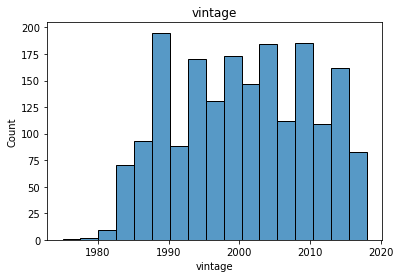

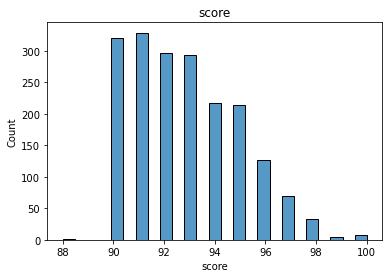

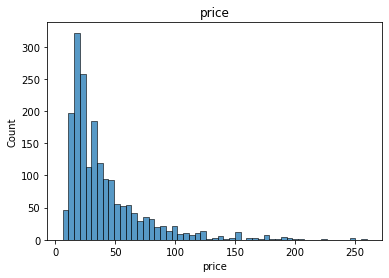

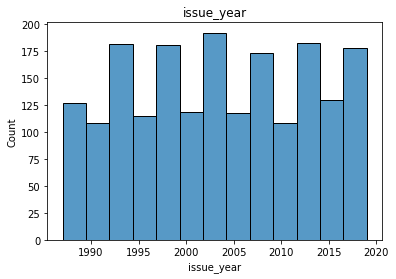

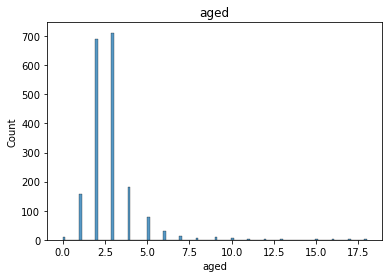

In [42]:
cols = ['vintage', 'score', 'price', 'issue_year', 'aged']
for col in cols:
    sns.histplot(data=train, x=col)
    plt.title(col)
    plt.show()

- most quality wines are less than $50
- most score between 90-95 points
- most wines are aged around 2-3 years

In [43]:
train.columns

Index(['winery', 'wine', 'vintage', 'note', 'score', 'price', 'issue_year',
       'top100_year', 'top100_rank', 'aged', 'France', 'Italy', 'California',
       'Spain', 'Australia', 'Washington', 'red', 'white', 'acidity', 'aromas',
       'berry', 'best', 'black', 'blackberry', 'cases', 'cherry', 'complex',
       'concentrated', 'currant', 'dark', 'drink', 'elegant', 'finish', 'firm',
       'flavors', 'fruit', 'fullbodied', 'imported', 'long', 'made', 'mineral',
       'notes', 'oak', 'pear', 'plum', 'raspberry', 'rich', 'ripe', 'spice',
       'tannins'],
      dtype='object')

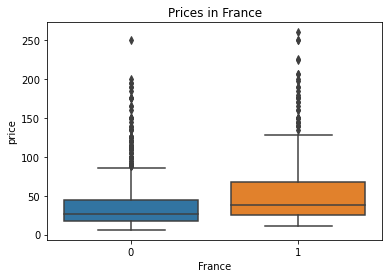

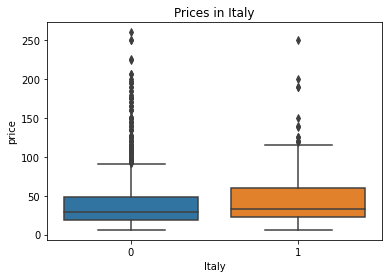

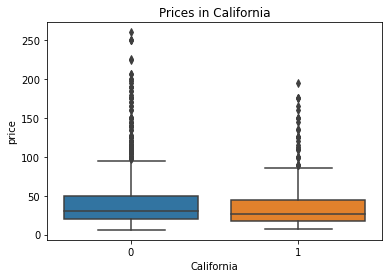

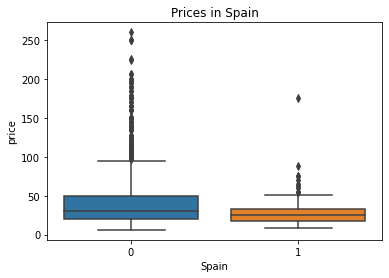

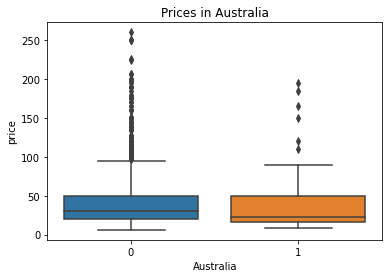

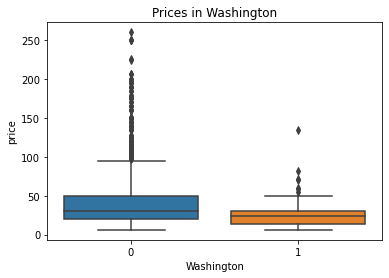

In [44]:
countries = ['France', 'Italy', 'California', 'Spain', 'Australia', 'Washington']
for c in countries:
    sns.boxplot(data=train, x=c, y='price')
    plt.title('Prices in '+c)
    plt.show()

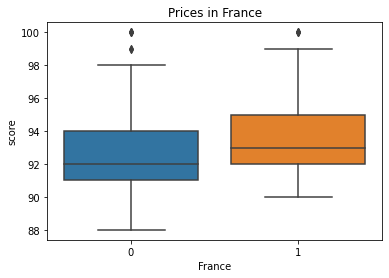

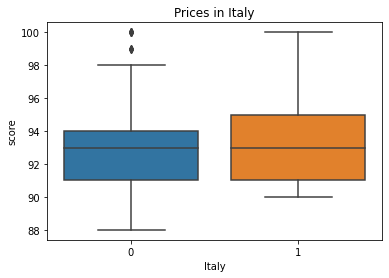

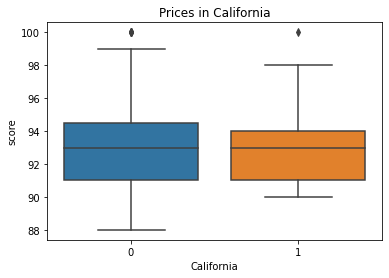

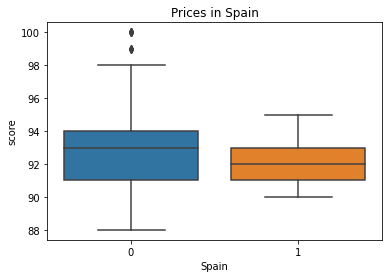

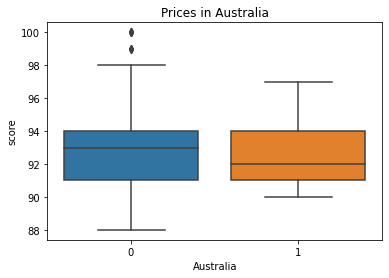

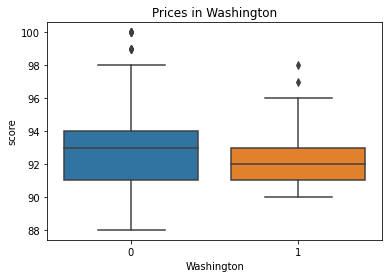

In [45]:
for c in countries:
    sns.boxplot(data=train, x=c, y='score')
    plt.title('Prices in '+c)
    plt.show()

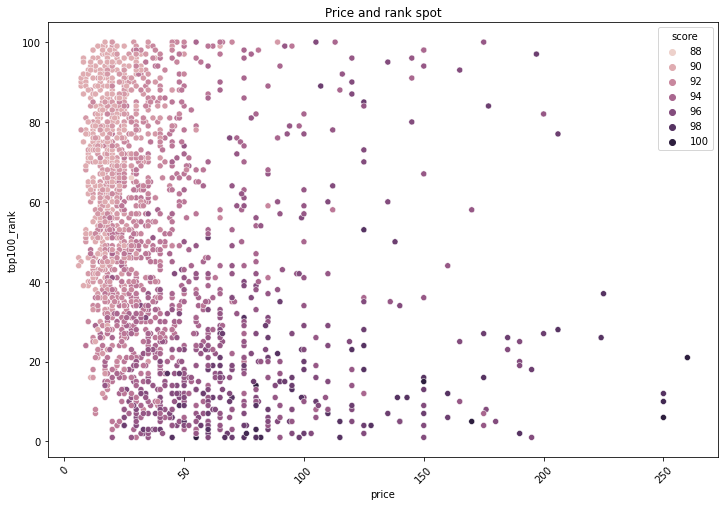

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x='price', y='top100_rank', hue='score')
plt.xticks(rotation=45)
plt.title('Price and rank spot')
plt.show()

- better score usually ranks higher and is more pricey

<AxesSubplot:xlabel='top100_rank', ylabel='top100_year'>

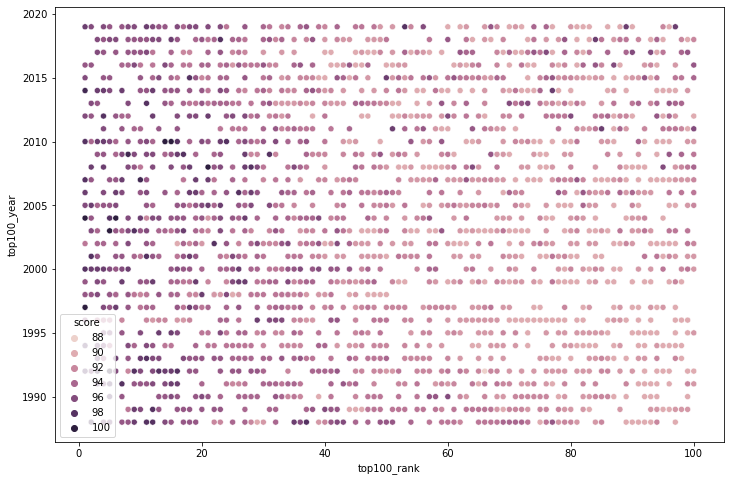

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x='top100_rank', y='top100_year', hue='score')

In [48]:
# train['aged'] = abs(train.issue_year - train.vintage)

<Figure size 864x576 with 0 Axes>

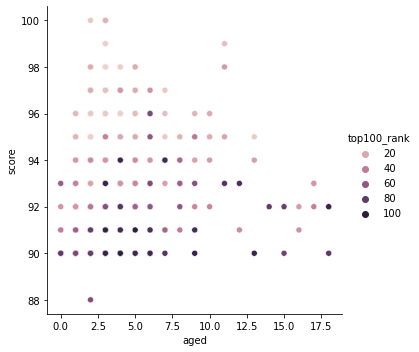

In [49]:
plt.figure(figsize=(12,8))
sns.relplot(data=train, x='aged', y='score', hue='top100_rank')
plt.show()

In [50]:
pd.crosstab(train.aged, train.score)

score,88,90,91,92,93,94,95,96,97,98,99,100
aged,,,,,,,,,,,,
0,0,4,2,1,1,0,0,0,0,0,0,0
1,0,73,40,18,10,6,7,3,0,0,0,0
2,1,140,137,125,109,69,52,34,18,6,0,1
3,0,75,105,96,120,91,100,58,37,19,4,7
4,0,17,31,32,31,26,23,15,4,4,0,0
5,0,3,1,12,9,12,20,10,7,3,0,0
6,0,4,5,4,6,4,4,2,2,0,0,0
7,0,1,4,0,1,4,1,1,1,0,0,0
8,0,0,1,1,2,2,1,0,0,0,0,0


----
# NLP EXPLORATION

In [51]:
# df.note = df.note.str.lower()

In [52]:
# df.note.head()

In [53]:
import unicodedata
import re
import json
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [54]:
# note = df.note.head(1).astype(str)[0]

In [55]:
# note = unicodedata.normalize('NFKD', note)\
#     .encode('ascii', 'ignore')\
#     .decode('utf-8', 'ignore')

In [56]:
# note = re.sub(r"[^a-z0-9'\s]", '', note)

In [57]:
# tokenizer = nltk.tokenize.ToktokTokenizer()

In [58]:
# wnl = nltk.stem.WordNetLemmatizer()

In [59]:
# lemmas = [wnl.lemmatize(word) for word in note.split()]
# note_lemmatized = ' '.join(lemmas)
# note_lemmatized

In [60]:
# stopword_list = stopwords.words('english')
# words = note.split()
# filtered = [w for w in words if w not in stopword_list]
# note_without = ' '.join(filtered)
# note_without

In [61]:
# stopword_list = stopwords.words('english')
# wnl = nltk.stem.WordNetLemmatizer()

# results = []
# for note in df.note:
#     note = unicodedata.normalize('NFKD', note).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     note = re.sub(r"[^a-z0-9'\s]", '', note)
#     lemmas = [wnl.lemmatize(word) for word in note.split()]
#     note_lemmatized = ' '.join(lemmas)
#     words = note.split()
#     filtered = [w for w in words if w not in stopword_list]
#     note_without = ' '.join(filtered)
#     results.append(note_without)

In [62]:
# df.note = results

In [63]:
df.note

0       rich massively concentrated layers plum anise ...
1       beautifully structured proportioned soft yet r...
2       truly great amazing concentration brimming foc...
3       rich rough magnificently complex powerful casc...
4       majestic beautifully harmonious seamless integ...
                              ...                        
3195    mediumbodied crisp tannic frame offers bright ...
3196    saturated dark currant fig blackberry compote ...
3197    zesty currant boysenberry notes tangy inviting...
3198    vivid minerally undertone marks pure raspberry...
3199    ripe currant blackberry plum flavors nicely di...
Name: note, Length: 3192, dtype: object

In [64]:
big_note = ''
for note in df.note:
    big_note += note

In [65]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

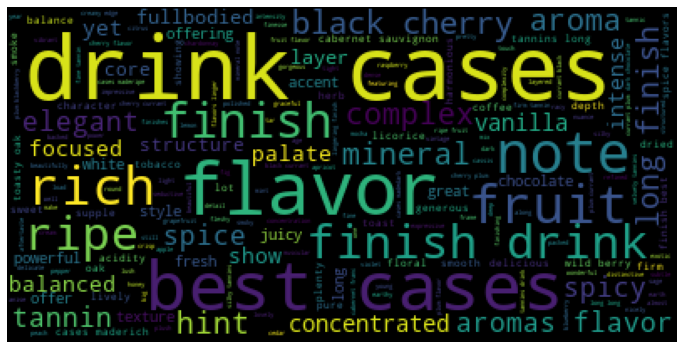

In [66]:
plt.figure(figsize=(12,8))
img = WordCloud().generate(big_note)
plt.imshow(img)
plt.axis('off')

In [67]:
top = (pd.Series(nltk.ngrams(big_note.split(), 2)).value_counts().head(20))
top.head()

(drink, cases)     1537
(best, cases)       920
(finish, drink)     396
(black, cherry)     371
(long, finish)      311
dtype: int64

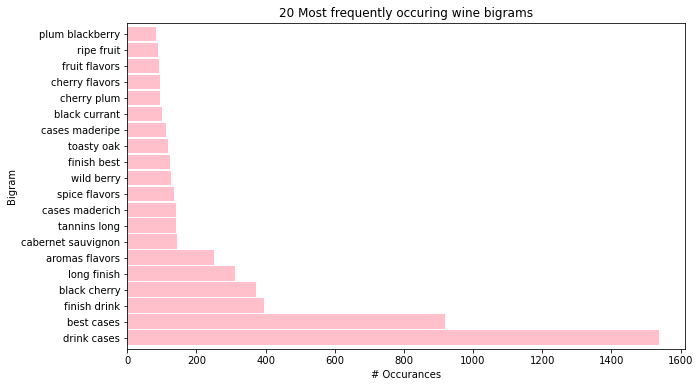

In [68]:
top.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring wine bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [69]:
words = pd.Series(big_note.split())

In [70]:
pd.DataFrame({'raw_count' : words.value_counts()}).assign(frequency=lambda d: d.raw_count / d.raw_count.sum()).assign(augmented_frequency=lambda d: d.frequency / d.frequency.max())

,raw_count,frequency,augmented_frequency
cases,2969,0.039450,1.000000
flavors,2183,0.029006,0.735264
finish,1854,0.024635,0.624453
drink,1608,0.021366,0.541596
long,1069,0.014204,0.360054
...,...,...,...
subtley,1,0.000013,0.000337
mayberemarkably,1,0.000013,0.000337
madewellrounded,1,0.000013,0.000337
drinkclassic,1,0.000013,0.000337


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Modeling with only the note and price

In [72]:
# t = TfidfVectorizer()
# X_nlp = t.fit_transform(df.note)
# y = df.price

In [73]:
# results = pd.DataFrame(X_nlp.todense(), columns=t.get_feature_names_out())

In [74]:
# results

In [75]:
import numpy as np

In [76]:
# results = results.replace(0.0, np.nan)

In [77]:
# threshold = int(round(.1 * len(results.index), 0))
# threshold

In [78]:
# results = results.dropna(axis='columns', thresh=319)

In [79]:
# results = handle_missing_values(results)

In [80]:
# results.shape

In [81]:
# results = results.fillna(0)

In [82]:
# results.index = df.index

In [83]:
# df = pd.concat([df, results], axis=1)

### Modeling without the note

In [84]:
train.columns.tolist()

['winery',
 'wine',
 'vintage',
 'note',
 'score',
 'price',
 'issue_year',
 'top100_year',
 'top100_rank',
 'aged',
 'France',
 'Italy',
 'California',
 'Spain',
 'Australia',
 'Washington',
 'red',
 'white',
 'acidity',
 'aromas',
 'berry',
 'best',
 'black',
 'blackberry',
 'cases',
 'cherry',
 'complex',
 'concentrated',
 'currant',
 'dark',
 'drink',
 'elegant',
 'finish',
 'firm',
 'flavors',
 'fruit',
 'fullbodied',
 'imported',
 'long',
 'made',
 'mineral',
 'notes',
 'oak',
 'pear',
 'plum',
 'raspberry',
 'rich',
 'ripe',
 'spice',
 'tannins']

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
def scale_data(train, val, test, cols_to_scale):
    '''
    This function takes in train, validate, and test dataframes as well as a
    list of features to be scaled via the MinMaxScalar. It then returns the 
    scaled versions of train, validate, and test in new dataframes. 
    '''
    # create copies to not mess with the original dataframes
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()
    
    # create the scaler and fit it
    scaler = MinMaxScaler()
    scaler.fit(train[cols_to_scale])
    
    # use the scaler to scale the data and resave
    train_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(train[cols_to_scale]),
                                               columns = train[cols_to_scale].columns.values).set_index([train.index.values])
    val_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(val[cols_to_scale]),
                                               columns = val[cols_to_scale].columns.values).set_index([val.index.values])
    test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(test[cols_to_scale]),
                                               columns = test[cols_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, val_scaled, test_scaled

In [86]:
cols = [
 'vintage',
 'score',
 # 'issue_year',
 # 'top100_year',
 'top100_rank',
 # 'price',
 'France',
 'Italy',
 'California',
 'Spain',
 'Australia',
 'Washington',
 'red',
 'white',
 'aged',
'acidity',
 'aromas',
 'berry',
 'best',
 'black',
 'blackberry',
 'cases',
 'cherry',
 'complex',
 'concentrated',
 'currant',
 'dark',
 'drink',
 'elegant',
 'finish',
 'firm',
 'flavors',
 'fruit',
 'fullbodied',
 'imported',
 'long',
 'made',
 'mineral',
 'notes',
 'oak',
 'pear',
 'plum',
 'raspberry',
 'red',
 'rich',
 'ripe',
 'spice',
 'tannins']

In [87]:
cols = train.columns.tolist()[4:]

In [88]:
cols.append('vintage')
cols

['score',
 'price',
 'issue_year',
 'top100_year',
 'top100_rank',
 'aged',
 'France',
 'Italy',
 'California',
 'Spain',
 'Australia',
 'Washington',
 'red',
 'white',
 'acidity',
 'aromas',
 'berry',
 'best',
 'black',
 'blackberry',
 'cases',
 'cherry',
 'complex',
 'concentrated',
 'currant',
 'dark',
 'drink',
 'elegant',
 'finish',
 'firm',
 'flavors',
 'fruit',
 'fullbodied',
 'imported',
 'long',
 'made',
 'mineral',
 'notes',
 'oak',
 'pear',
 'plum',
 'raspberry',
 'rich',
 'ripe',
 'spice',
 'tannins',
 'vintage']

In [89]:
train.shape, val.shape, test.shape

((1914, 50), (639, 50), (639, 50))

In [90]:
train.drop(columns=['wine', 'winery', 'note']).shape

(1914, 47)

In [91]:
len(cols)

47

In [92]:
train.head()

,winery,wine,vintage,note,score,price,issue_year,top100_year,top100_rank,aged,...,mineral,notes,oak,pear,plum,raspberry,rich,ripe,spice,tannins
145,Hogue,Johannisberg Riesling Yakima Valley,1988,firm flavorful beautifully defined peach aroma...,90,6.0,1989,1989,46,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
392,Reichsgraf von Kesselstatt,Riesling Spätlese Mosel-Saar-Ruwer Scharzhofbe...,1989,,90,13.0,1990,1991,93,1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
343,Nobilo,Chardonnay Gisborne Tietjen Vineyard Reserve,1989,buttery flavorful smooth almost unctuous textu...,93,18.0,1991,1991,44,2,...,0.0,0.099709,0.000000,0.126733,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
574,Clos Pegase,Cabernet Sauvignon Napa Valley,1990,firm intense solid core cherry currant plum sp...,91,17.0,1993,1993,75,3,...,0.0,0.109276,0.136805,0.000000,0.109923,0.000000,0.000000,0.0,0.114404,0.096666
395,Lar de Lares,Tierra de Barros Gran Reserva,1982,distinctive rich mature elegant plenty spicy b...,90,14.0,1991,1991,96,9,...,0.0,0.000000,0.000000,0.000000,0.000000,0.154291,0.107367,0.0,0.000000,0.000000


In [93]:
train_scaled, val_scaled, test_scaled = scale_data(train.drop(columns=['wine', 'winery', 'note']),
                                                   val.drop(columns=['wine', 'winery', 'note']),
                                                   test.drop(columns=['wine', 'winery', 'note']),
                                                   cols)

In [113]:
X_train, y_train = train.drop(columns=['winery', 'wine', 'note', 'price','issue_year', 'top100_year']), pd.DataFrame(train.price)
X_val, y_val = val.drop(columns=['winery', 'wine', 'note', 'price','issue_year', 'top100_year']), pd.DataFrame(val.price)
X_test, y_test = test.drop(columns=['winery', 'wine', 'note', 'price','issue_year', 'top100_year']), pd.DataFrame(test.price)

In [114]:
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [115]:
def get_models_with_results(X_train, y_train, X_val, y_val):
    ''' 
    This function takes in the X and y objects and then runs the following models:
    - Baseline model using y_train mean
    - LarsLasso model with alpha=1
    - Quadratic Linear Regression
    - Cubic Linear Regression
    
    Returns a DataFrame with the results.
    '''
    # Baseline Model
    # run the model
    pred_mean = y_train.price.mean()
    y_train['pred_mean'] = pred_mean
    y_val['pred_mean'] = pred_mean
    rmse_train = mean_squared_error(y_train.price, y_train.pred_mean, squared=False)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_mean, squared=False)

    # save the results
    metrics = pd.DataFrame(data=[{
        'model': 'baseline_mean',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_mean),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_mean)}])

    # OLS Model
    lm = LinearRegression(normalize=True)
    lm.fit(X_train, y_train.price)
    y_train['pred_lm'] = lm.predict(X_train)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_lm, squared=False)
    y_val['pred_lm'] = lm.predict(X_val)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_lm, squared=False)
    
    # save the results
    metrics = metrics.append({
        'model': 'OLS',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_lm),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_lm)}, ignore_index=True)
    
    
    # LassoLars Model
    # run the model
    lars = LassoLars(alpha=1)
    lars.fit(X_train, y_train.price)
    y_train['pred_lars'] = lars.predict(X_train)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_lars, squared=False)
    y_val['pred_lars'] = lars.predict(X_val)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_lars, squared=False)

    # save the results
    metrics = metrics.append({
        'model': 'LarsLasso, alpha 1',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_lars),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_lars)}, ignore_index=True)

    
    
    glm = TweedieRegressor(power=1, alpha=0)
    glm.fit(X_train, y_train.price)
    y_train['pred_glm'] = glm.predict(X_train)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_glm, squared=False)
    y_val['pred_glm'] = glm.predict(X_val)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_glm, squared=False)
    
    # save the results
    metrics = metrics.append({
        'model': 'Tweedie, power 1',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_glm),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_glm)}, ignore_index=True)
    
    
    glm2 = TweedieRegressor(power=2, alpha=0)
    glm2.fit(X_train, y_train.price)
    y_train['pred_glm2'] = glm2.predict(X_train)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_glm2, squared=False)
    y_val['pred_glm2'] = glm2.predict(X_val)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_glm2, squared=False)
    
    # save the results
    metrics = metrics.append({
        'model': 'Tweedie, power 2',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_glm),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_glm)}, ignore_index=True)
    
    
    glm3 = TweedieRegressor(power=3, alpha=0)
    glm3.fit(X_train, y_train.price)
    y_train['pred_glm3'] = glm3.predict(X_train)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_glm3, squared=False)
    y_val['pred_glm3'] = glm3.predict(X_val)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_glm3, squared=False)
    
    # save the results
    metrics = metrics.append({
        'model': 'Tweedie, power 3',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_glm),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_glm)}, ignore_index=True)
    
    
    # Polynomial Models
    # set up the model
    pf = PolynomialFeatures(degree=2)
    X_train_d2 = pf.fit_transform(X_train)
    X_val_d2 = pf.transform(X_val)
    
    # run the model
    lm2 = LinearRegression()
    lm2.fit(X_train_d2, y_train.price)
    y_train['pred_lm2'] = lm2.predict(X_train_d2)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_lm2, squared=False)
    y_val['pred_lm2'] = lm2.predict(X_val_d2)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_lm2, squared=False)

    # save the results
    metrics = metrics.append({
        'model': 'Quadratic Linear Regression',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_lm2),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_lm2)}, ignore_index=True)

    # set up the model
    pf = PolynomialFeatures(degree=3)
    X_train_d3 = pf.fit_transform(X_train)
    X_val_d3 = pf.transform(X_val)

    # run the model
    lm3 = LinearRegression()
    lm3.fit(X_train_d3, y_train.price)
    y_train['pred_lm3'] = lm3.predict(X_train_d3)
    rmse_train = mean_squared_error(y_train.price, y_train.pred_lm3, squared=False)
    y_val['pred_lm3'] = lm3.predict(X_val_d3)
    rmse_val = mean_squared_error(y_val.price, y_val.pred_lm3, squared=False)

    # save the results
    metrics = metrics.append({
        'model': 'Cubic Linear Regression',
        'rmse_train': rmse_train,
        'r2_train': explained_variance_score(y_train.price, y_train.pred_lm3),
        'rmse_val': rmse_val,
        'r2_val': explained_variance_score(y_val.price, y_val.pred_lm3)}, ignore_index=True)

    return metrics

In [116]:
metrics = get_models_with_results(X_train, y_train, X_val, y_val)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_1307/1298073372.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: Fut

In [117]:
metrics

,model,rmse_train,r2_train,rmse_val,r2_val
0,baseline_mean,3.424219e+01,0.000000,38.316894,0.000000
1,OLS,2.128003e+01,0.613792,25.690013,0.550104
2,"LarsLasso, alpha 1",3.424219e+01,0.000000,38.316894,0.000000
3,"Tweedie, power 1",2.289577e+01,0.552918,27.738692,0.475601
4,"Tweedie, power 2",2.366983e+01,0.552918,28.170522,0.475601
5,"Tweedie, power 3",2.424933e+01,0.552918,28.705496,0.475601
6,Quadratic Linear Regression,1.304892e+01,0.854780,35.865212,0.122665
7,Cubic Linear Regression,1.563634e-07,1.000000,148.756586,-14.059942


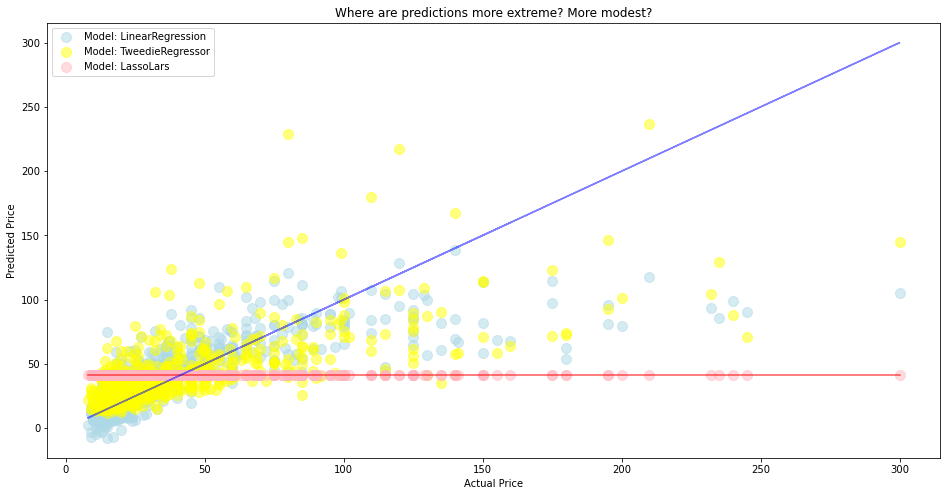

In [118]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_val.price, y_val.pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (0, 340000))
plt.plot(y_val.price, y_val.price, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 15000), rotation=25.5)

plt.scatter(y_val.price, y_val.pred_lm, 
            alpha=.5, color="lightblue", s=100, label="Model: LinearRegression")
plt.scatter(y_val.price, y_val.pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_val.price, y_val.pred_lars, 
            alpha=.5, color="lightpink", s=100, label="Model: LassoLars")
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Where are predictions more extreme? More modest?")

plt.show()